In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Customer segmentation

Customer segmentation is the process of dividing customers into groups based on common characteristics so companies can market to each group effectively and appropriately.

In [2]:
data = pd.read_csv('data/Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
X = data.drop('CustomerID',axis=1)

In [5]:
X = pd.get_dummies(X)

In [6]:
X.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


k: 1  wcss: 308911.33999999997
k: 2  wcss: 212938.71508951415
k: 3  wcss: 143440.43314900767
k: 4  wcss: 104463.19922884135
k: 5  wcss: 75448.45165554191
k: 6  wcss: 58396.839405039405
k: 7  wcss: 51180.90047021942
k: 8  wcss: 44439.281529581516
k: 9  wcss: 41048.009984223565
k: 10  wcss: 37696.69154753291
k: 11  wcss: 34711.486012665926
k: 12  wcss: 31706.01670486375
k: 13  wcss: 29434.278866283348
k: 14  wcss: 28217.965655359134
k: 15  wcss: 26516.066648629145
k: 16  wcss: 24758.383642174806
k: 17  wcss: 23798.09994792787
k: 18  wcss: 22379.20331074154
k: 19  wcss: 20962.35547785549
k: 20  wcss: 20065.899444509734
k: 21  wcss: 19193.223979967406
k: 22  wcss: 17730.657783882783
k: 23  wcss: 17315.12425629924
k: 24  wcss: 16423.110553335555
k: 25  wcss: 15723.073590298587
k: 26  wcss: 15051.303146853152
k: 27  wcss: 14615.469083694084
k: 28  wcss: 14520.936904761906
k: 29  wcss: 13095.928571428567


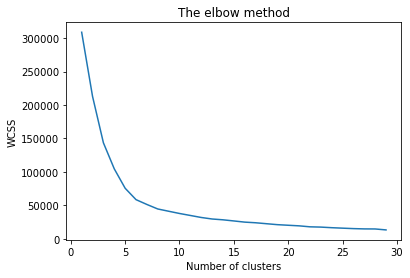

In [7]:
### Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1,30):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) #inertia is the sum of diff between centroid and corrsponding datapoint(variance)
    print('k:',i," wcss:",kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 30), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [15]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 100, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

In [16]:
y_kmeans

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 2, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [17]:
data['Cluster'] = y_kmeans

In [18]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,4
2,3,Female,20,16,6,0
3,4,Female,23,16,77,4
4,5,Female,31,17,40,0


In [19]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,15)})

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

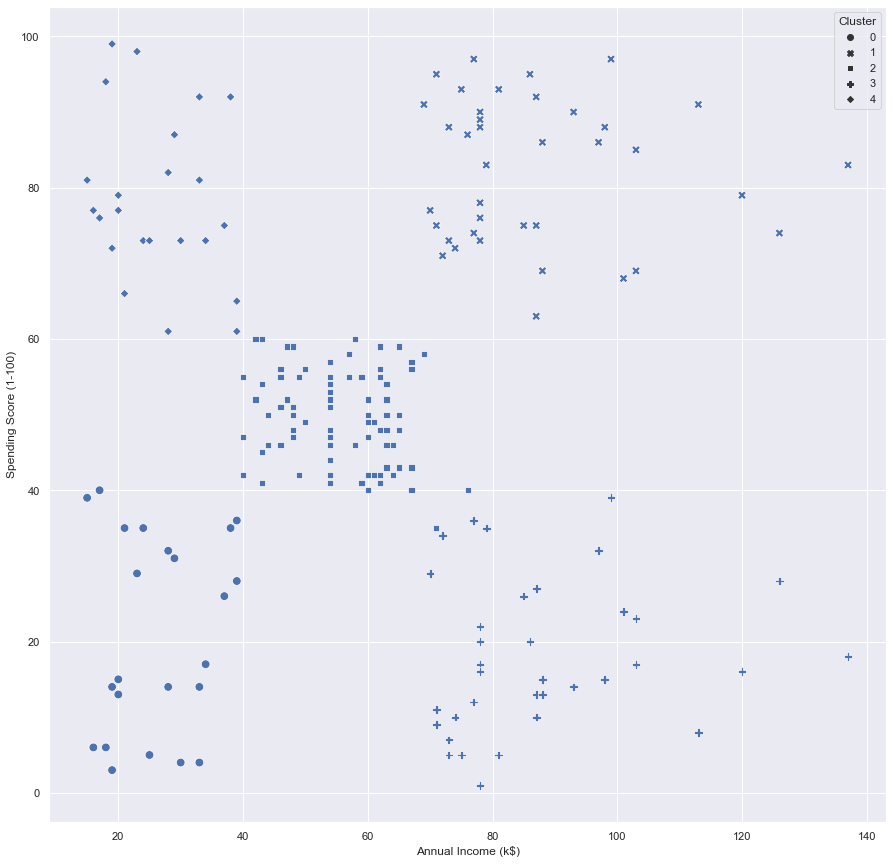

In [20]:
sns.scatterplot(data=data, x="Annual Income (k$)", y="Spending Score (1-100)",style='Cluster',s=75)

In [14]:
#END